# MALA sampling of MLP weights using XOR data

Learn the XOR function by sampling the weights of a multi-layer perceptron (MLP) via MALA.

In [1]:
## Import packages

import numpy as np

import torch

from torch.utils.data import DataLoader
from torch.distributions import Normal

from eeyore.data import Iris
from eeyore.models import mlp
from eeyore.mcmc import MALA

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load XOR data

iris = Iris()
dataloader = DataLoader(iris, batch_size=150)

In [4]:
## Setup MLP model

hparams = mlp.Hyperparameters(dims=[4, 2, 3])
model = mlp.MLP(hparams=hparams)
model.prior = Normal(
    torch.zeros(model.num_params(), dtype=model.dtype),
    np.sqrt(3)*torch.ones(model.num_params(), dtype=model.dtype)
)

In [21]:
## Setup MALA sampler

theta0 = model.prior.sample()
sampler = MALA(model, theta0, dataloader, step=0.02)

In [22]:
## Run MALA sampler

sampler.run(num_iterations=1100, num_burnin=100)

In [23]:
## Compute acceptance rate

sampler.chain.acceptance_rate()

0.15199999511241913

In [24]:
## Compute Monte Carlo mean

sampler.chain.mean()

tensor([-0.1893,  2.4358, -3.7189,  0.8789,  1.7230, -0.2490, -2.3994, -2.6000,
         2.1315,  5.0570,  5.2841,  0.6565, -3.9622,  1.9442, -2.5386, -3.1977,
        -3.0745, -0.8267,  1.2488], dtype=torch.float64)

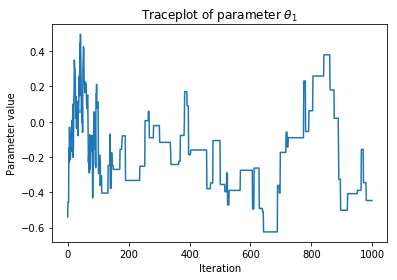

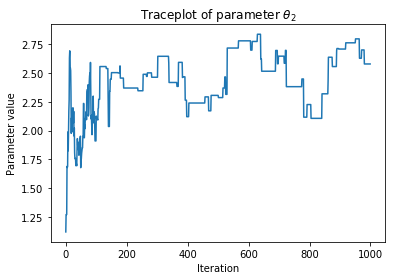

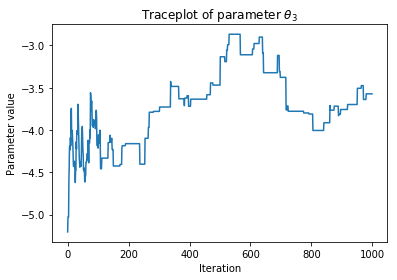

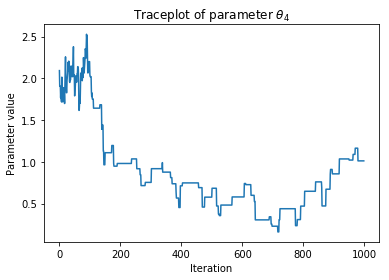

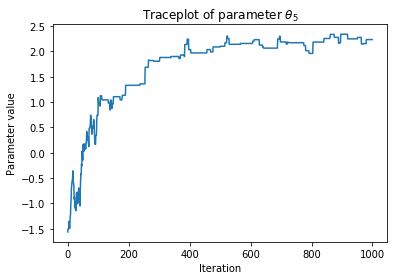

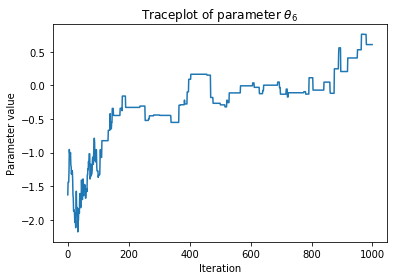

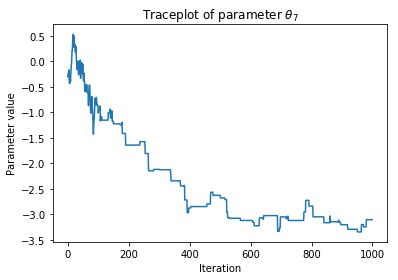

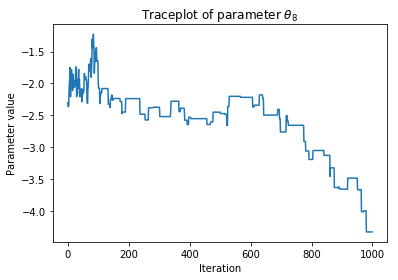

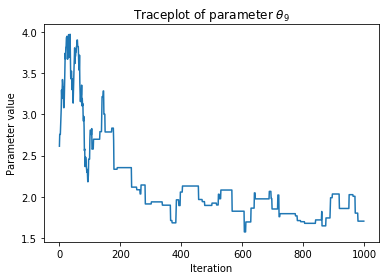

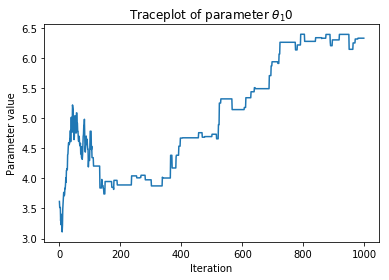

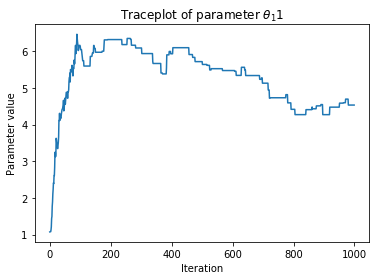

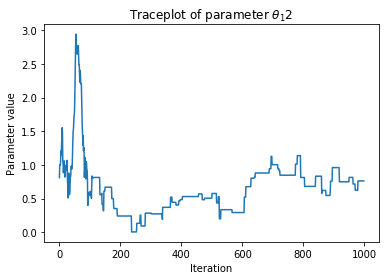

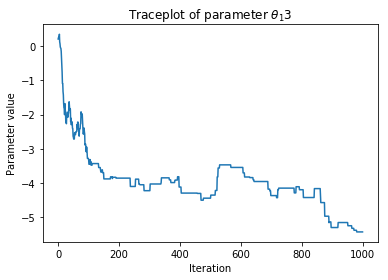

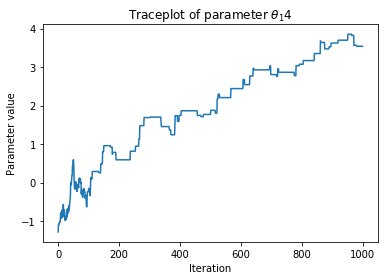

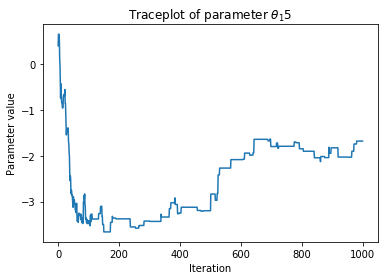

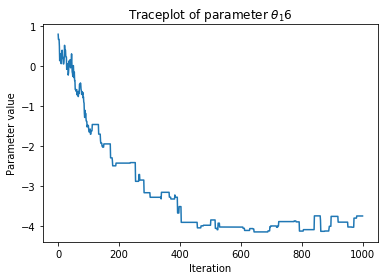

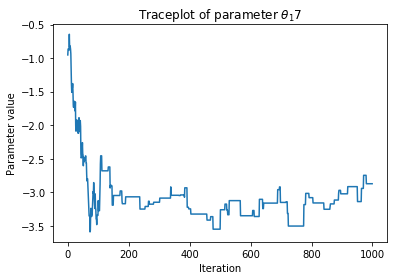

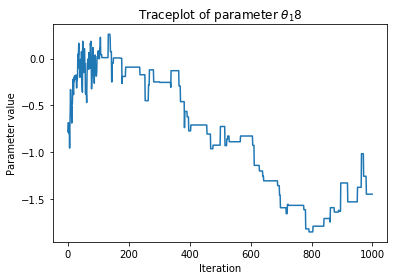

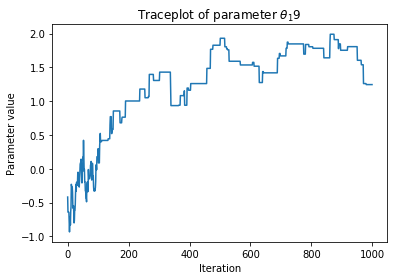

In [25]:
## Plot traces of simulated Markov chain

for i in range(model.num_params()):
    chain = sampler.chain.get_theta(i)
    plt.figure()
    sns.lineplot(range(len(chain)), chain)
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.title(r'Traceplot of parameter $\theta_{}$'.format(i+1))

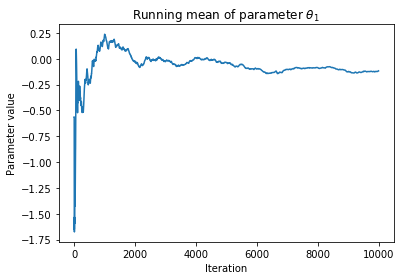

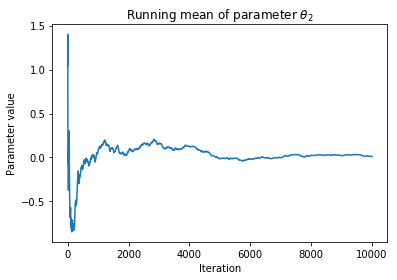

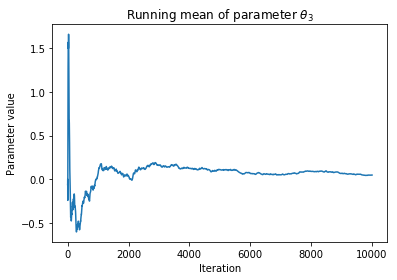

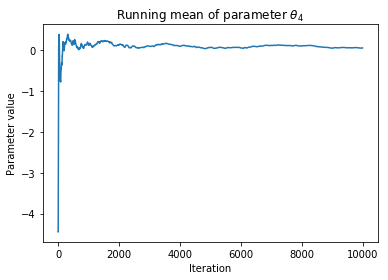

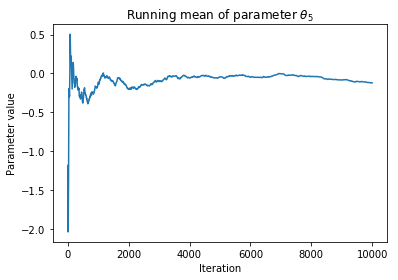

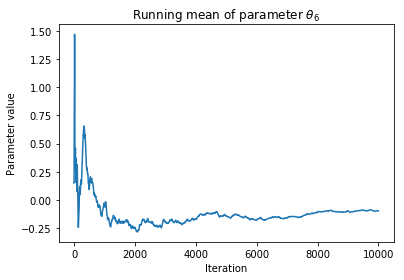

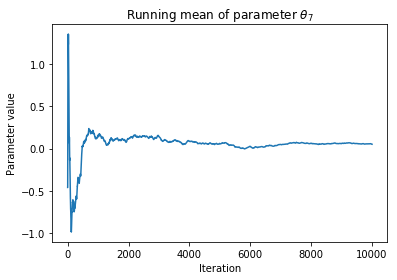

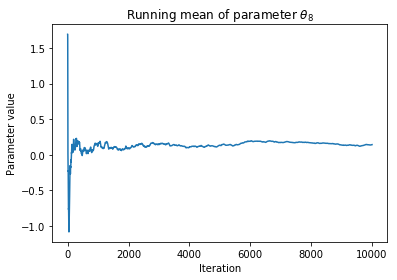

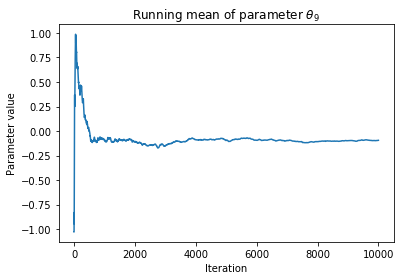

In [9]:
## Plot running means of simulated Markov chain

for i in range(model.num_params()):
    chain = sampler.chain.get_theta(i)
    chain_mean = torch.empty(len(chain))
    chain_mean[0] = chain[0]
    for j in range(1, len(chain)):
        chain_mean[j] = (chain[j]+j*chain_mean[j-1])/(j+1)
        
    plt.figure()
    sns.lineplot(range(len(chain)), chain_mean)
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.title(r'Running mean of parameter $\theta_{}$'.format(i+1))

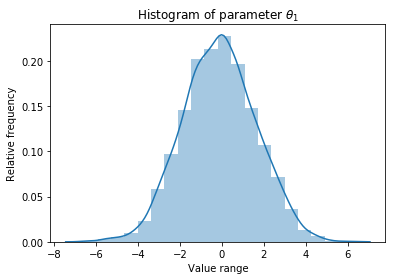

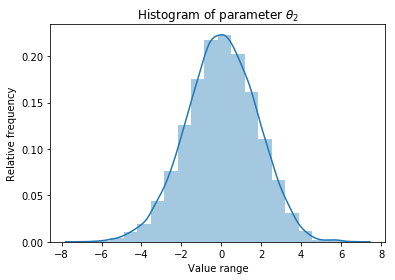

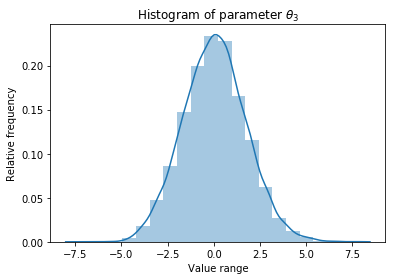

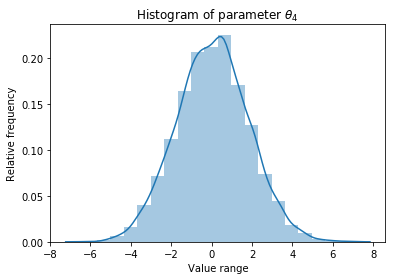

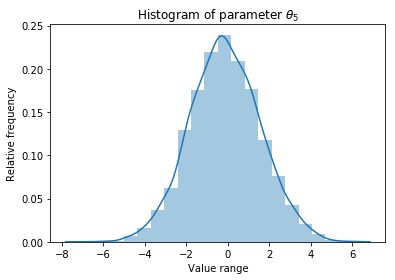

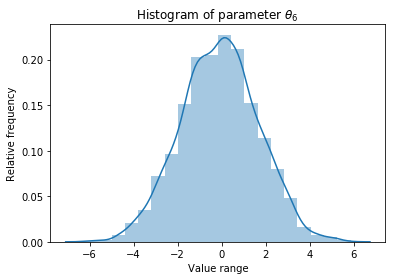

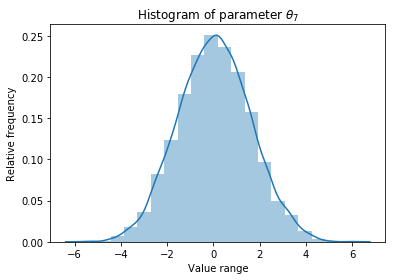

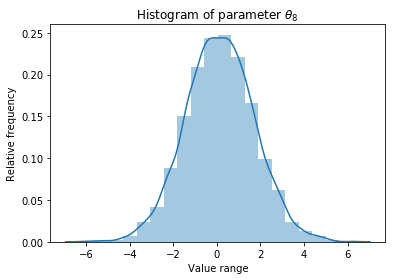

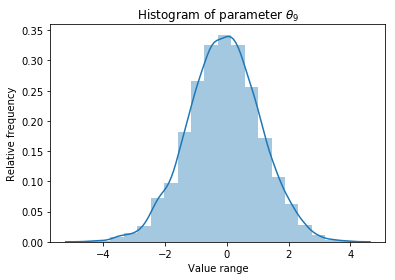

In [10]:
## Plot histograms of simulated Markov chain

for i in range(model.num_params()):
    plt.figure()
    sns.distplot(sampler.chain.get_theta(i), bins=20, norm_hist=True)
    plt.xlabel('Value range')
    plt.ylabel('Relative frequency')
    plt.title(r'Histogram of parameter $\theta_{}$'.format(i+1))